In [1]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d

In [19]:
def gas_profile(sn, rmax=300, Nbin=1024, dN=1024, center=None):
    if center is None:
        center = np.array([sn.BoxSize] * 3)/2.

    pos = sn.part0.pos - center
    r = np.linalg.norm(pos, axis=1)
    N = len(r)
    
    out = {}
    out['rlist'] = []
    out['rholist'] = []
    out['err_rholist'] = []
    
    imin = 0
    
    keysort = np.argsort(r)
    r = r[keysort]
    rho = sn.part0.mass[keysort]
    
    while imin < N:
        averho = np.mean(rho[imin:imin+Nbin])
        aver = np.mean(r[imin:imin+Nbin])

        # rho_err = np.std(rho[imin:imin+Nbin])
        
        out['rlist'].append(aver)
        out['rholist'].append(averho)
        # out['err_rholist'].append(rho_err)
        
        imin += dN
    
    for k in out.keys():
        out[k] = np.array(out[k])
    
    # now make plotting rlist
    out['rlist_plot'] = np.logspace(-1, 3, 10000)
    out['rho_interp'] = interp1d(out['rlist'], out['rholist'], 
                                 bounds_error=False, fill_value='extrapolate')
    out['rholist_plot'] = out['rho_interp'](out['rlist_plot'])
    
    return out

In [14]:
beta = '08'
RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sn = {}
prof = {}

for RC in RC_list:
    sn[RC] = {}
    prof[RC] = {}
    for vphi in vphi_list:
        icname = 'lvl5-dens-grid/beta'+beta+'/RC'+RC+'-vphi'+vphi+'/MW_ICs-beta'+beta+'-RC'+RC+'-vphi'+vphi+'.dat'
        sn[RC][vphi] = arepo.Snapshot(icname)
        prof[RC][vphi] = gas_profile(sn[RC][vphi])

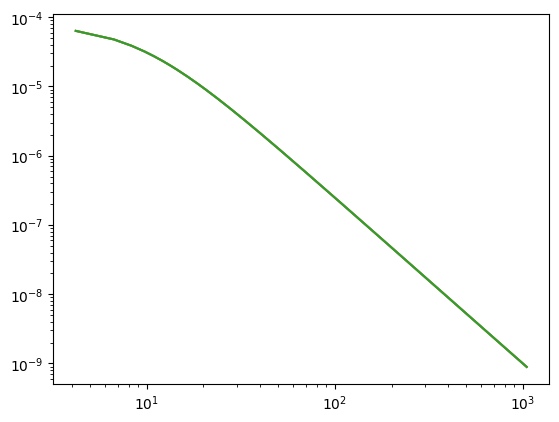

In [16]:
## sanity check that vphi doesnt change anything
RC = '9'
for vphi in vphi_list:
    plt.plot(prof[RC][vphi]['rlist'], prof[RC][vphi]['rholist'])
    plt.xscale('log')
    plt.yscale('log')

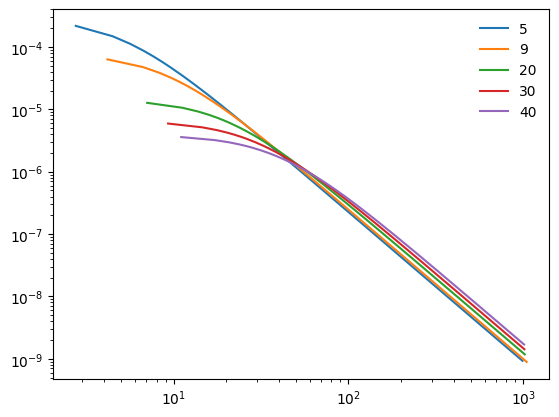

In [18]:
## varying RC
vphi = '02'
for RC in RC_list:
    plt.plot(prof[RC][vphi]['rlist'], prof[RC][vphi]['rholist'], label=RC)
    plt.xscale('log')
    plt.yscale('log')
plt.legend(frameon=False)